# Analysis Report: Predicting Passenger Survival on the Titanic
**Author**: PUNEETH G S  

# Analysis of Predicting Passenger Survival on the Titanic
# source : kaggle


## 1. Identifying Key Factors
- **Data Exploration**: Start with exploratory data analysis (EDA) to understand the relationships between features and survival.
  - Use visualizations (e.g., bar charts, histograms) to observe distributions.
  - Perform correlation analysis to see how attributes relate to survival.

## 2. Data Preprocessing & Feature Engineering
- **Handling Missing Values**:
  - Check for missing data in key columns (e.g., Age, Cabin).
  - Impute missing values (e.g., using the median for Age, or creating a new category for missing Cabins).
  
- **Encoding Categorical Variables**:
  - Convert categorical features (like 'Sex' and 'Embarked') into numerical values (e.g., using one-hot encoding).

- **Creating New Features**:
  - **Family Size**: Combine 'SibSp' (siblings/spouses aboard) and 'Parch' (parents/children aboard) to create a 'FamilySize' feature.
  - **Title Extraction**: Extract titles from names to analyze social status (e.g., Mr., Mrs., Miss).

## 3. Model Development & Evaluation
- **Model Selection**:
  - Start with **Logistic Regression**: Good for baseline performance; interpretable results.
  - Implement a **Random Forest**: Useful for capturing non-linear relationships and interactions.
  
- **Model Training**:
  - Split the dataset into training and test sets (e.g., 80/20 split).
  - Train models on the training set with appropriate hyperparameters.

- **Evaluation**:
  - Use metrics such as accuracy, precision, recall, and F1-score to evaluate model performance.
  - Consider ROC-AUC for a more nuanced view of model discrimination ability.

## 4. Interpreting Results
- **Model Performance Analysis**: 
  - Compare accuracy and other metrics between models.
  - Use **feature importance** from Random Forest to identify key factors contributing to survival.

- **Insights & Biases**:
  - Analyze how features like gender and class affect survival rates.
  - Discuss any biases observed in the dataset and their potential implications.

### Optional Next Steps
- **Hyperparameter Tuning**: Optimize model performance through grid search or random search.
- **Cross-Validation**: Implement k-fold cross-validation to ensure the model's robustness.
- **Visualization of Results**: Use confusion matrices and feature importance plots to communicate findings.


# data description 
1. **User_ID**: `string` - A unique identifier for each user (e.g., a shortened version of a UUID).
2. **Product_ID**: `string` - A unique identifier for each product (e.g., a shortened version of a UUID).
3. **Category**: `string` - The product category (e.g., Electronics, Clothing, Sports, etc.).
4. **Price**: `float64` - The original price of the product before any discount is applied.
5. **Discount (%)**: `float64` - The discount percentage applied to the product.
6. **Final_Price**: `float64` - The final price of the product after applying the discount.
7. **Payment_Method**: `string` - The method used for payment (e.g., Credit Card, UPI, Net Banking).
8. **Purchase_Date**: `date` - The date when the transaction occurred, formatted as MM-DD-YYYY.





## Methodology Overview

### 1. Load and Explore the Dataset
- Import the Titanic dataset and examine its structure.
- Identify feature types (categorical, numerical) and check for missing values.

### 2. Perform Data Cleaning and Preprocessing
- Impute missing values (median for age, mode for embarkation).
- Convert categorical variables to numerical format.
- Create new features like "Family Size" and "Title."
- Normalize or scale numerical features if necessary.

### 3. Analyze and Visualize Key Metrics
- Explore survival distribution by key variables (e.g., gender, class).
- Use visualizations (bar charts, heatmaps) to identify patterns.
- Analyze correlations between features and their impact on survival.

### 4. Develop and Evaluate Machine Learning Models
- Split the dataset into training and testing sets.
- Train models like Logistic Regression and Random Forest.
- Compare performance using accuracy, precision, recall, and F1-score.
- Optimize the best model through hyperparameter tuning.

### 5. Draw Conclusions and Provide Recommendations
- Interpret key findings and identify influential survival factors.
- Suggest improvements for model performance.
- Discuss the approach's applicability to othetails on any specific section!

In [1]:
#importing the necessary modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# reading the data 
data = pd.read_csv(r"C:\Users\punee\Downloads\titanic_dataset\tested.csv")

In [3]:
# data top 5 columns 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# getting the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
# drop the duplicate 
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True , drop=True)

In [6]:
# check for null values

null_counts = data.isnull().sum()
if null_counts.sum() >0:
    print(null_counts[null_counts>0])

Age       86
Fare       1
Cabin    327
dtype: int64


In [7]:
# if the data is 5-10% null values 
data = data[data['Age'].notna()]

In [8]:
# the 70 drop column 
data.drop(columns={"Cabin"} , inplace=True)

In [9]:
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

In [10]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
# drop duplicate 
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True)

In [12]:
# checking for the data types
data.dtypes

index            int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [13]:
# changing the Age int 
data['Age'] = data['Age'].astype("int")

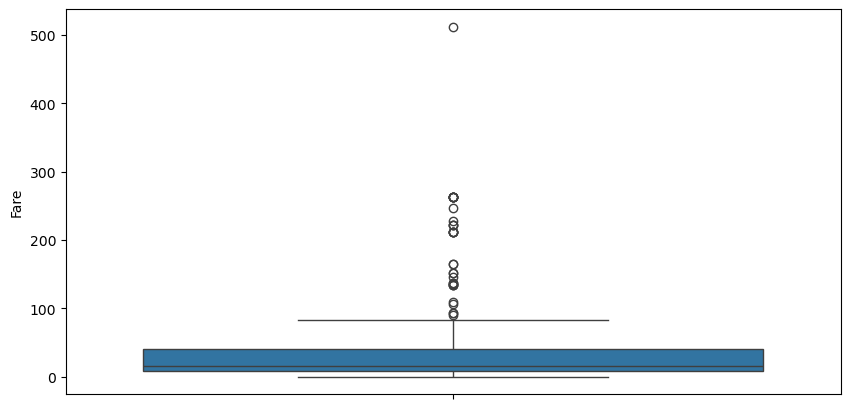

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data['Fare'])
plt.show()


In [15]:
data.columns

Index(['index', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [16]:
# handling outliers
data = data[data['Fare']<500]

In [17]:
# calculate Z_score 
z_score = np.abs(data[['Age' , "SibSp"]] - data[['Age' , "SibSp"]].mean()) / data[["Age" , "SibSp"]].std()

In [18]:
# oytlier with threshold 
outlier_treshold = 3
outliers = data[(np.abs(z_score['Age']) > outlier_treshold) | (np.abs(z_score['SibSp']) > outlier_treshold)]


In [19]:
print(outliers)

     index  PassengerId  Survived  Pclass  \
46      55          947         0       3   
78      96          988         1       1   
112    140         1032         1       3   
123    154         1046         0       3   
171    214         1106         1       3   
284    360         1252         0       3   
301    379         1271         0       3   

                                                  Name     Sex  Age  SibSp  \
46                                Rice, Master. Albert    male   10      4   
78   Cavendish, Mrs. Tyrell William (Julia Florence...  female   76      1   
112                        Goodwin, Miss. Jessie Allis  female   10      5   
123                       Asplund, Master. Filip Oscar    male   13      4   
171             Andersson, Miss. Ida Augusta Margareta  female   38      4   
284                        Sage, Master. William Henry    male   14      8   
301                        Asplund, Master. Carl Edgar    male    5      4   

     Parch    

In [20]:
# apply the 95 percentile 
age_threshold = data['Age'].quantile(0.95)
sisb_threshiold = data['SibSp'].quantile(0.95)


In [21]:
data['Age'] = np.where(data['Age'] > age_threshold ,age_threshold , data['Age'])
data['SibSp'] = np.where(data["SibSp"] > sisb_threshiold, sisb_threshiold ,  data['SibSp'])

In [22]:
# drop the columns 
data.columns

Index(['index', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [23]:
data.drop(columns={"Name"} ,inplace=True)

In [24]:
data

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,892,0,3,male,34.0,0.0,0,330911,7.8292,Q
1,1,893,1,3,female,47.0,1.0,0,363272,7.0000,S
2,2,894,0,2,male,57.0,0.0,0,240276,9.6875,Q
3,3,895,0,3,male,27.0,0.0,0,315154,8.6625,S
4,4,896,1,3,female,22.0,1.0,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
327,409,1301,1,3,female,3.0,1.0,1,SOTON/O.Q. 3101315,13.7750,S
328,411,1303,1,1,female,37.0,1.0,0,19928,90.0000,Q
329,412,1304,1,3,female,28.0,0.0,0,347086,7.7750,S
330,414,1306,1,1,female,39.0,0.0,0,PC 17758,108.9000,C


In [25]:
# will be continued 

In [77]:
data.columns

Index(['index', 'PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [79]:
data.drop(columns={"index"} , inplace=True)

In [83]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [96]:

data.Embarked

0      Q
1      S
2      Q
3      S
4      S
      ..
327    S
328    Q
329    S
330    C
331    S
Name: Embarked, Length: 331, dtype: object

In [85]:
# developing model 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [98]:
# encode the data 
Label_encode = LabelEncoder()
data['Sex'] = Label_encode.fit_transform(data['Sex'])
data['Embarked'] = Label_encode.fit_transform(data['Embarked'])

In [146]:
# set the target and features 

X = data[['Pclass',  'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

y = data['Survived']

In [148]:
# train test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
Model.fit(X_train , y_train)  
y_pred = Model.predict(X_test) 

In [150]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.79      0.76        42
           1       0.59      0.52      0.55        25

    accuracy                           0.69        67
   macro avg       0.66      0.65      0.66        67
weighted avg       0.68      0.69      0.68        67



In [170]:
new_passenger = np.array([[3,22, 1, 0, 7.25, 2]])   # [Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]

survival_prediction = Model.predict(new_passenger)

print("Survived" if survival_prediction[0] == 1 else "Did Not Survive")

Survived


# using Logistic regression 

In [188]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print("Logistic Regression Accuracy:", log_reg.score(X_test, y_test))




Logistic Regression Accuracy: 0.6716417910447762


In [190]:
new_passenger = np.array([[5,25, 0, 1, 8.9, 1]])   # [Pclass, Age, SibSp, Parch, Fare, Embarked]

survival_prediction = Model.predict(new_passenger)

print("Survived" if survival_prediction[0] == 1 else "Did Not Survive")

Did Not Survive


In [ ]:
# 2 